In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("C:\\Desktop\housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [14]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.dropna(inplace=True)

In [5]:
data.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
data.shape

(20433, 10)

In [7]:
from sklearn.model_selection import train_test_split
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [9]:
train_data=x_train.join(y_train)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

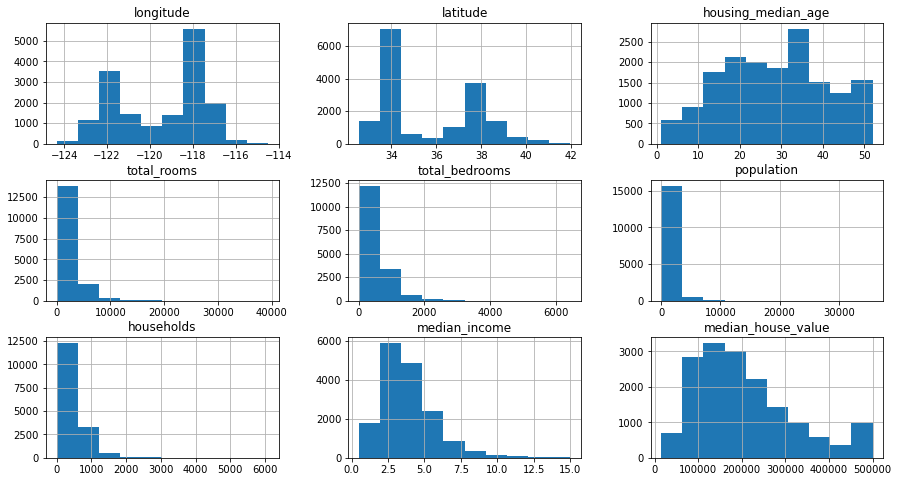

In [10]:
train_data.hist(figsize=(15,8))

<AxesSubplot:>

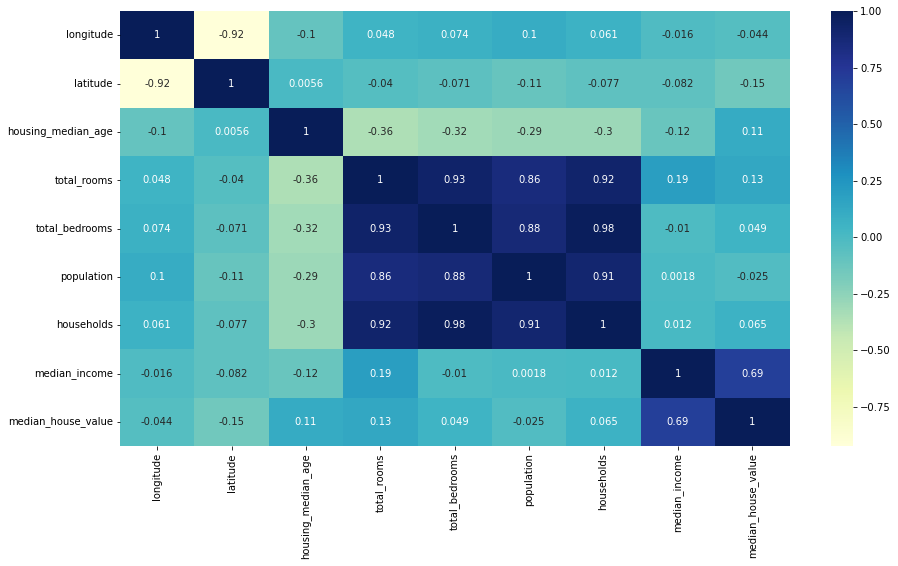

In [26]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

In [11]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

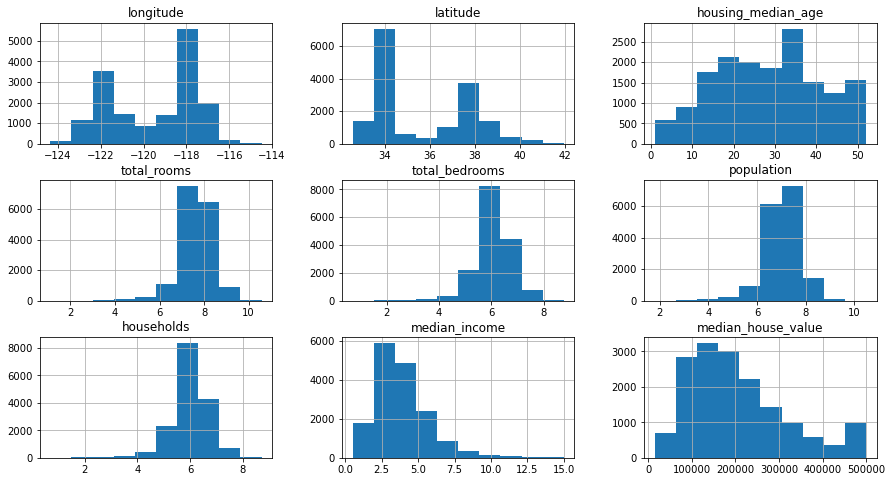

In [12]:
train_data.hist(figsize=(15,8))

In [13]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [14]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
15952,-122.45,37.72,52.0,7.455877,5.768321,6.792344,5.707110,4.3036,261800.0,0,0,0,1,0
12498,-121.46,38.56,52.0,7.467942,5.921578,6.639876,5.913503,2.9191,111800.0,0,1,0,0,0
17550,-121.87,37.35,52.0,7.351158,6.052089,7.365813,6.075346,2.3277,183700.0,1,0,0,0,0
15983,-122.47,37.76,52.0,7.893945,6.608001,7.370231,6.570883,2.5933,359600.0,0,0,0,1,0
14275,-117.13,32.70,42.0,7.099202,5.680173,6.852243,5.556828,0.8991,78900.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7762,-118.10,33.91,36.0,6.985642,5.308268,6.579251,5.308268,4.2679,175800.0,1,0,0,0,0
1521,-122.07,37.91,28.0,7.457032,5.690359,6.698268,5.690359,5.0391,259800.0,0,0,0,1,0
16336,-121.35,38.04,12.0,8.735204,6.927558,8.235361,6.869014,3.7206,146000.0,0,1,0,0,0
5949,-117.86,34.14,36.0,8.038512,6.504288,7.303170,6.453625,3.1905,235300.0,0,1,0,0,0


<AxesSubplot:>

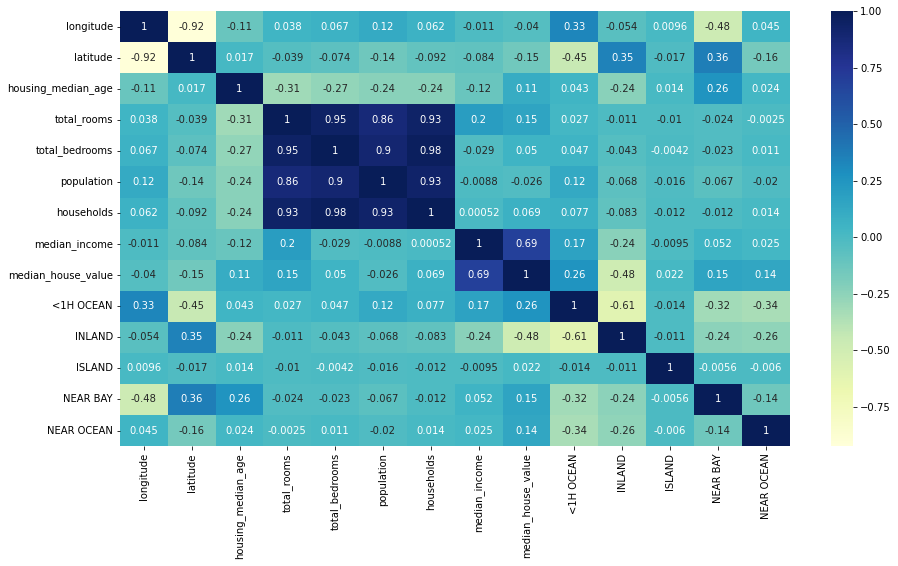

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

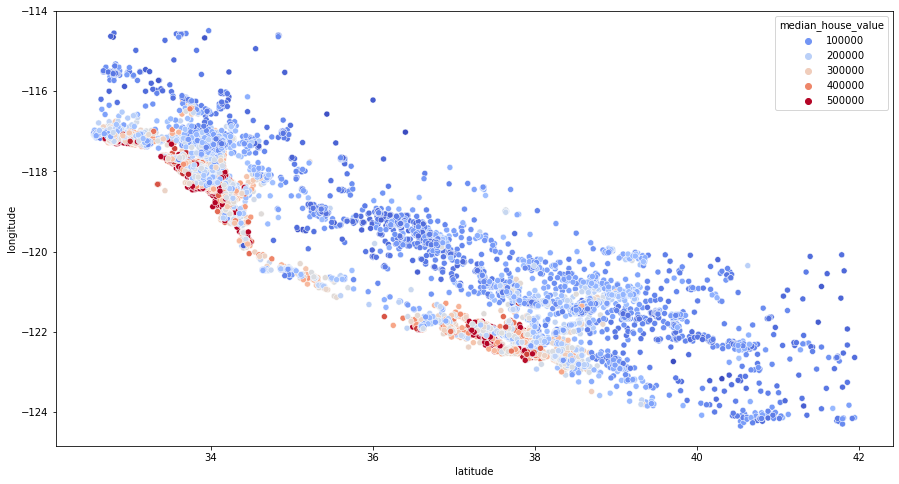

In [16]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [17]:
train_data['bedroom_ratio']= train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<AxesSubplot:>

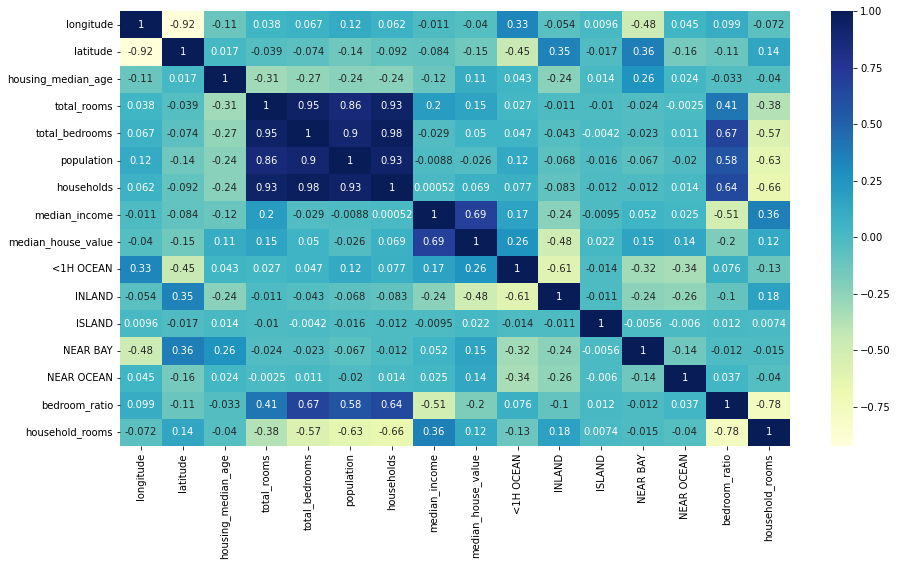

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()

x_train,y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
x_train_s=Scaler.fit_transform(x_train)
reg=LinearRegression()

reg.fit(x_train_s,y_train)

LinearRegression()

In [20]:
test_data=x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
test_data['bedroom_ratio']= test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']
x_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [21]:
x_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [ ]:
x_test_s=Scaler.transform(x_test)

In [29]:
reg.score(x_test_s,y_test)

0.6752031044439313

In [34]:
from sklearn.preprocessing import StandardScaler
stds=StandardScaler()
scaler=stds.fit(x_train)
rescaledx=scaler.transform(x_train)

In [38]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(rescaledx,y_train)


RandomForestRegressor()

In [39]:
forest.score(x_test_s,y_test)

0.8175431159969158

In [37]:
import pickle


In [43]:
import pickle
file = open('housing_price.pkl','wb')
pickle.dump(forest,file)
file.close()